<a href="https://colab.research.google.com/github/Navneet-Nicer/Bike-Sharing-Demand-Prediction/blob/main/Regression_Bike_Sharing_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   $\color{red}{\text{Bike Sharing Demand Prediction}}$

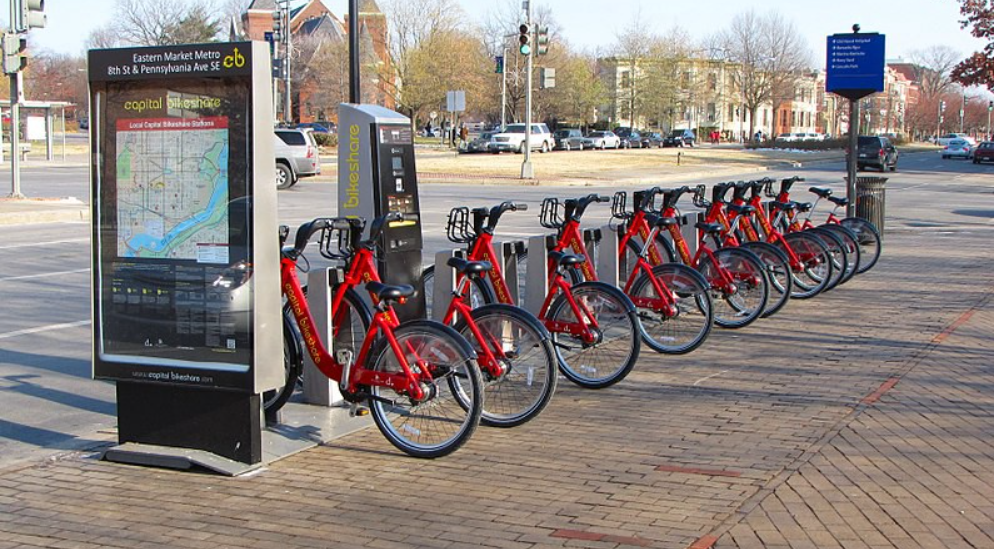

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Navneet Singh}}$


**Data Set Information:**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

🔶Date : year-month-day

🔶Rented Bike count - Count of bikes rented at each hour

🔶Hour - Hour of he day

🔶Temperature-Temperature in Celsius

🔶Humidity - %

🔶Windspeed - m/s

🔶Visibility - 10m

🔶Dew point temperature - Celsius

🔶Solar radiation - MJ/m2

🔶Rainfall - mm

🔶Snowfall - cm

🔶Seasons - Winter, Spring, Summer, Autumn

🔶Holiday - Holiday/No holiday

🔶Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



**Table of Contents :**

**Data Manipulation**

Importing Dataset

Dataset View

Dataset Information

Summary Statistics

Checking for unique values in integer type attribute

Checking for missing values in each column

percentage of missing values in each column

**Data Visualization**

Missing Value Plot

Density Plot of Continuous Variables

Box plot for each continuous variavles

Heatmap

Density plot of each continuous variable after applying Power Transformer

Box plot of each continuous variable after applying Power Transformer

Bar Plot of each variable show label distribution of target variable

Pie chart of Categorical Variables

Count Plot of Categorical variable

**Variance Inflation Factor**

**Feature Selection**

Feature Importance Graph

**Splitting our dataset into train and test set**

**Feature Scaling**

**Modeling**

linear Regression

Polynomial Regression

Decision Tree Regresion

Random Forest Regression

Bagging Regressor

Stacking Regressor

**Model Comparison**

Maximum Accuracies in each Column

Minimum Accuracies in each Column

## **Data Manipulation**

#### **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

#### **Importing dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Bike Sharing.csv', encoding= 'unicode_escape')

In [6]:
# Dataset View
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Dataset Information**

* One feature is in Date type.

* Four Features are in integer data types.

* Six Features are in float data types.

* Three Features are in object data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        8760 non-null   object 
 1   Rented Bike Count           8760 non-null   int64  
 2   Hour                        8760 non-null   int64  
 3   Temperature(Â°C)            8760 non-null   float64
 4   Humidity(%)                 8760 non-null   int64  
 5   Wind speed (m/s)            8760 non-null   float64
 6   Visibility (10m)            8760 non-null   int64  
 7   Dew point temperature(Â°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)     8760 non-null   float64
 9   Rainfall(mm)                8760 non-null   float64
 10  Snowfall (cm)               8760 non-null   float64
 11  Seasons                     8760 non-null   object 
 12  Holiday                     8760 non-null   object 
 13  Functioning Day             8760 

In [8]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        8760 non-null   object 
 1   Rented Bike Count           8760 non-null   float64
 2   Hour                        8760 non-null   object 
 3   Temperature(Â°C)            8760 non-null   float64
 4   Humidity(%)                 8760 non-null   int64  
 5   Wind speed (m/s)            8760 non-null   float64
 6   Visibility (10m)            8760 non-null   int64  
 7   Dew point temperature(Â°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)     8760 non-null   float64
 9   Rainfall(mm)                8760 non-null   float64
 10  Snowfall (cm)               8760 non-null   float64
 11  Seasons                     8760 non-null   object 
 12  Holiday                     8760 non-null   object 
 13  Functioning Day             8760 

In [10]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

**Brief Information of different descriptive statistics-**

* Measures of Frequency :- Count, Percent, Frequency.

* Measures of Central Tendency :- Mean, Median, and Mode.

* Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.

* Measures of Position :- Percentile Ranks, Quartile Ranks.

In [11]:
df.describe().style.background_gradient()

,Rented Bike Count,Temperature(Â°C),Humidity,Wind speed,Visibility,Dew point temperature(Â°C),Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Checking for unique values in all attribute, Different numbers of distint values in each attribute.our target varibale is Rented Bike Count.

In [12]:
df.nunique().sort_values(ascending=True)

Holiday                          2
Functioning Day                  2
Seasons                          4
Hour                            24
Snowfall                        51
Rainfall                        61
Wind speed                      65
Humidity                        90
Radiation                      345
Date                           365
Temperature(Â°C)               546
Dew point temperature(Â°C)     556
Visibility                    1789
Rented Bike Count             2166
dtype: int64

Checking for missing values in each column

In [13]:
df.isnull().sum()

Date                          0
Rented Bike Count             0
Hour                          0
Temperature(Â°C)              0
Humidity                      0
Wind speed                    0
Visibility                    0
Dew point temperature(Â°C)    0
Radiation                     0
Rainfall                      0
Snowfall                      0
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

percentage of missing values in each column

In [14]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                         0.00 %
Rented Bike Count            0.00 %
Hour                         0.00 %
Temperature(Â°C)             0.00 %
Humidity                     0.00 %
Wind speed                   0.00 %
Visibility                   0.00 %
Dew point temperature(Â°C)   0.00 %
Radiation                    0.00 %
Rainfall                     0.00 %
Snowfall                     0.00 %
Seasons                      0.00 %
Holiday                      0.00 %
Functioning Day              0.00 %
dtype: float64


**Data Visualization**

Missing Value Plot

In [15]:
import missingno as msno

<Axes: >

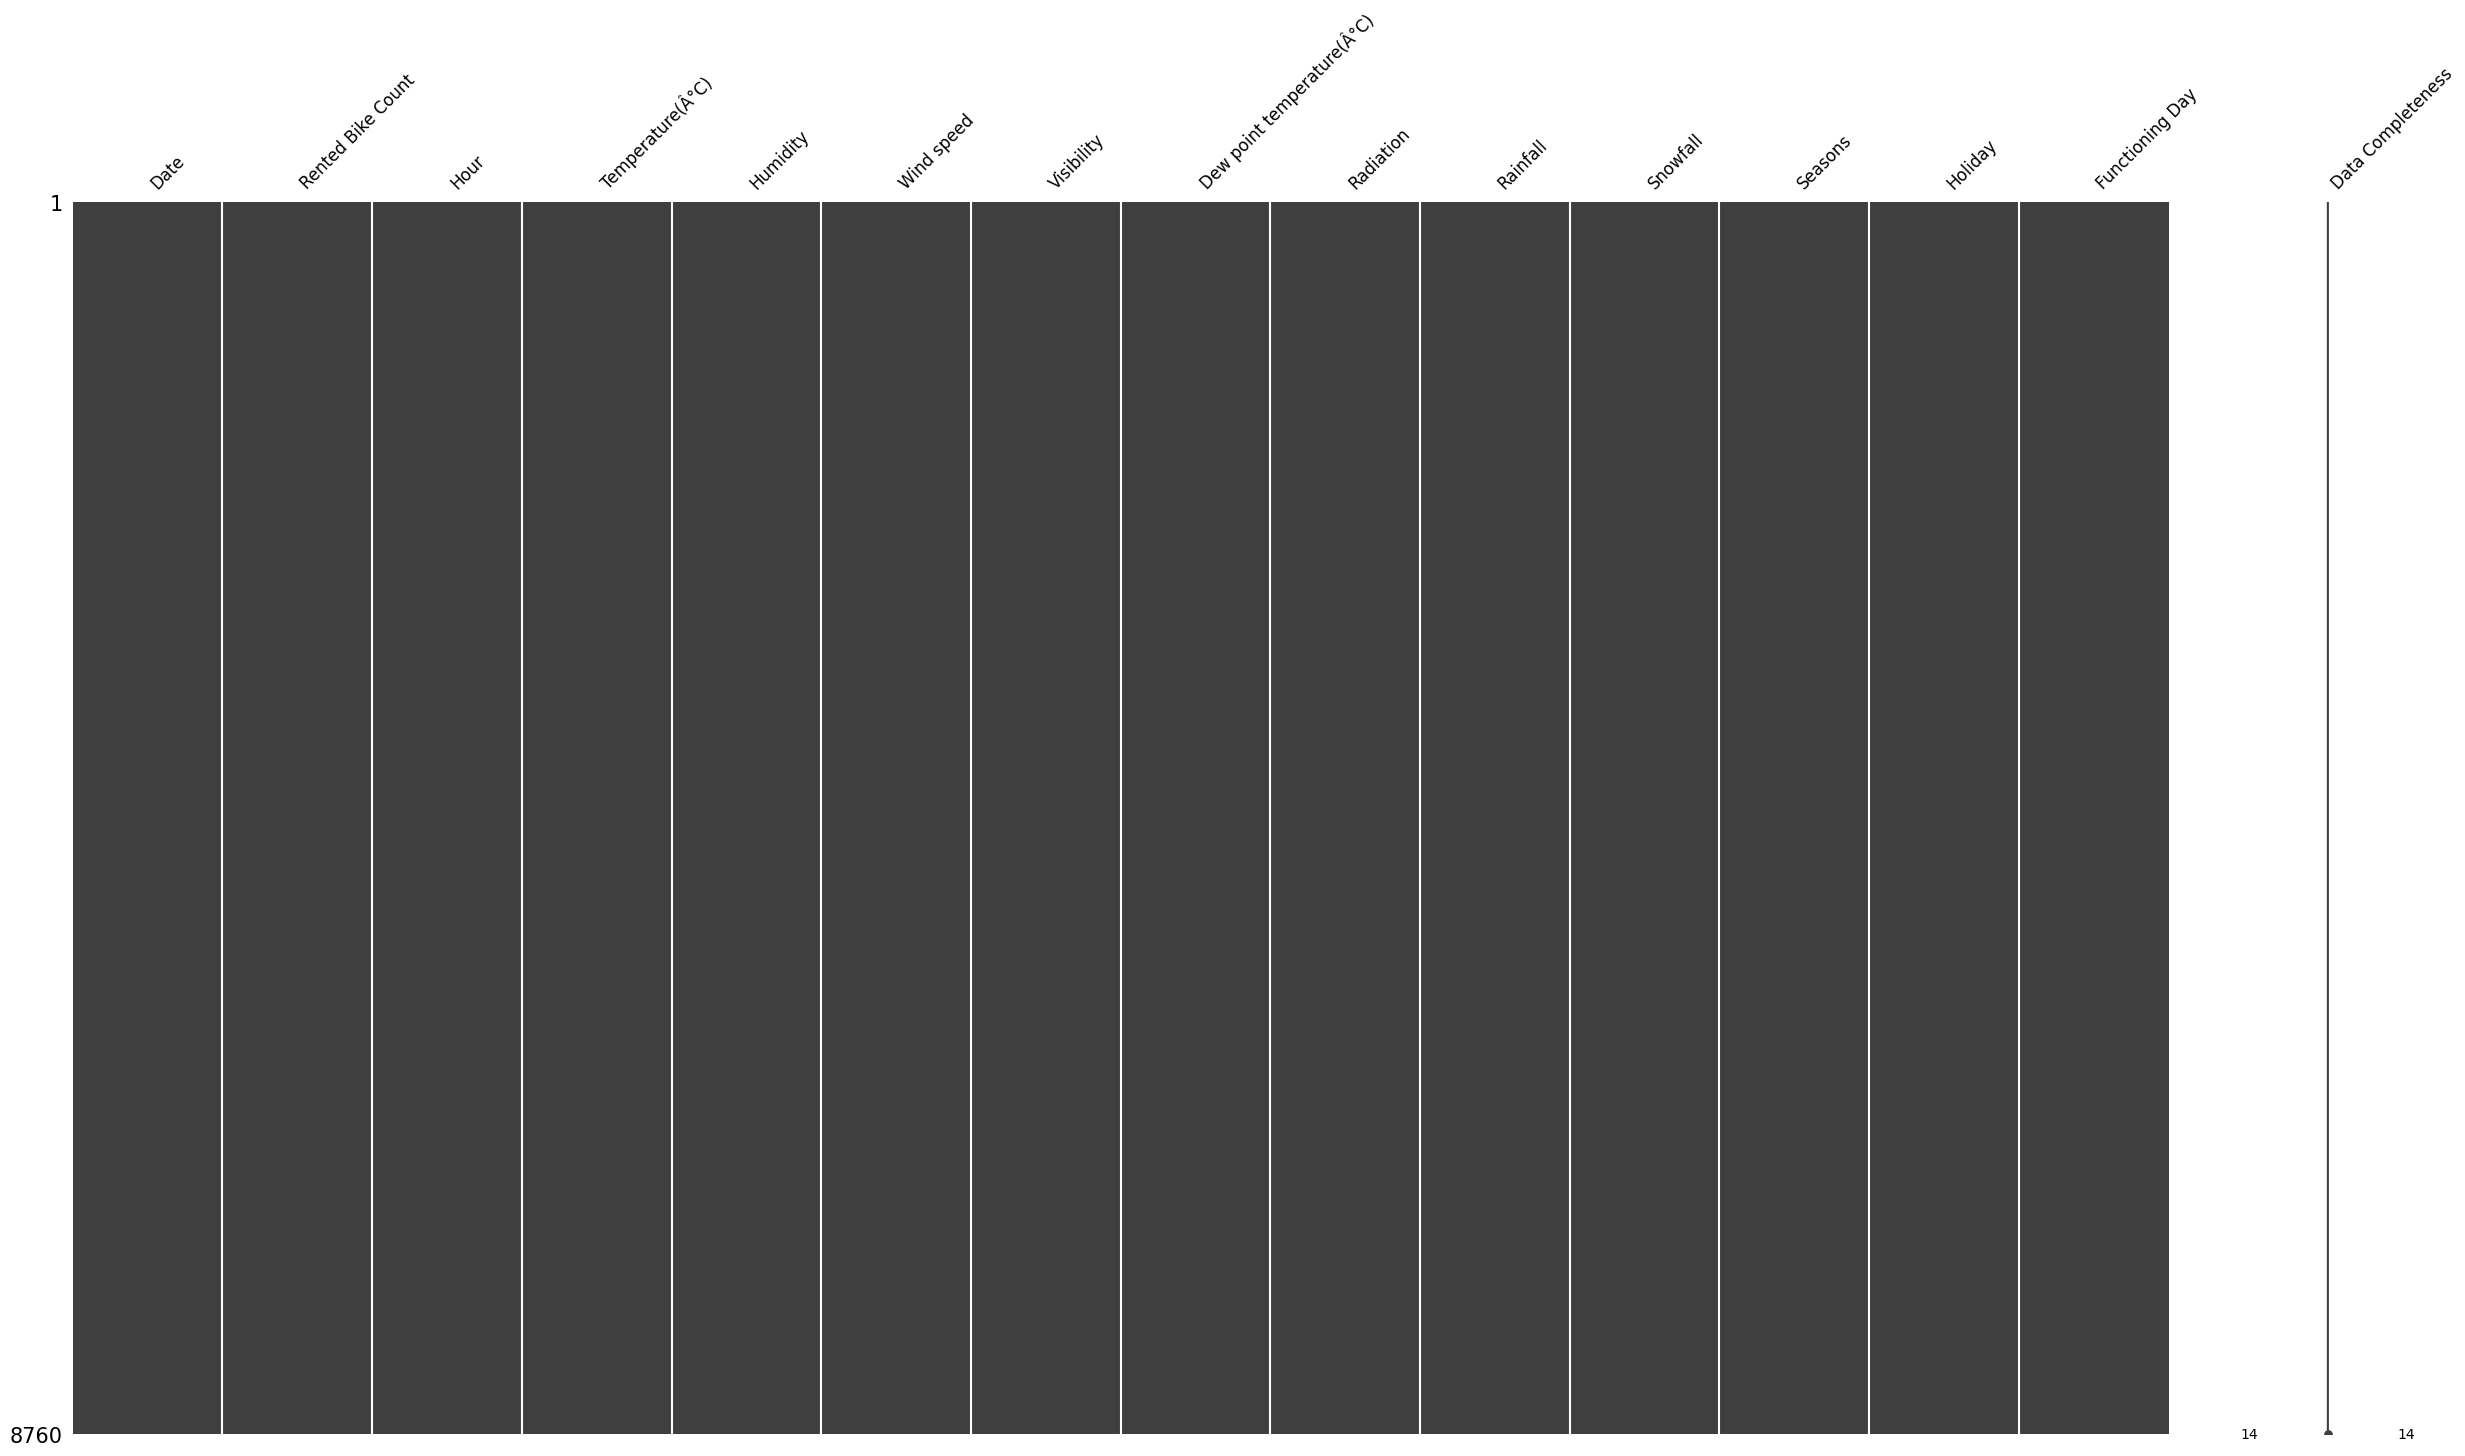

In [16]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

**Bar Plot** - Here we can look at each plot and see the hours wise data distribution.

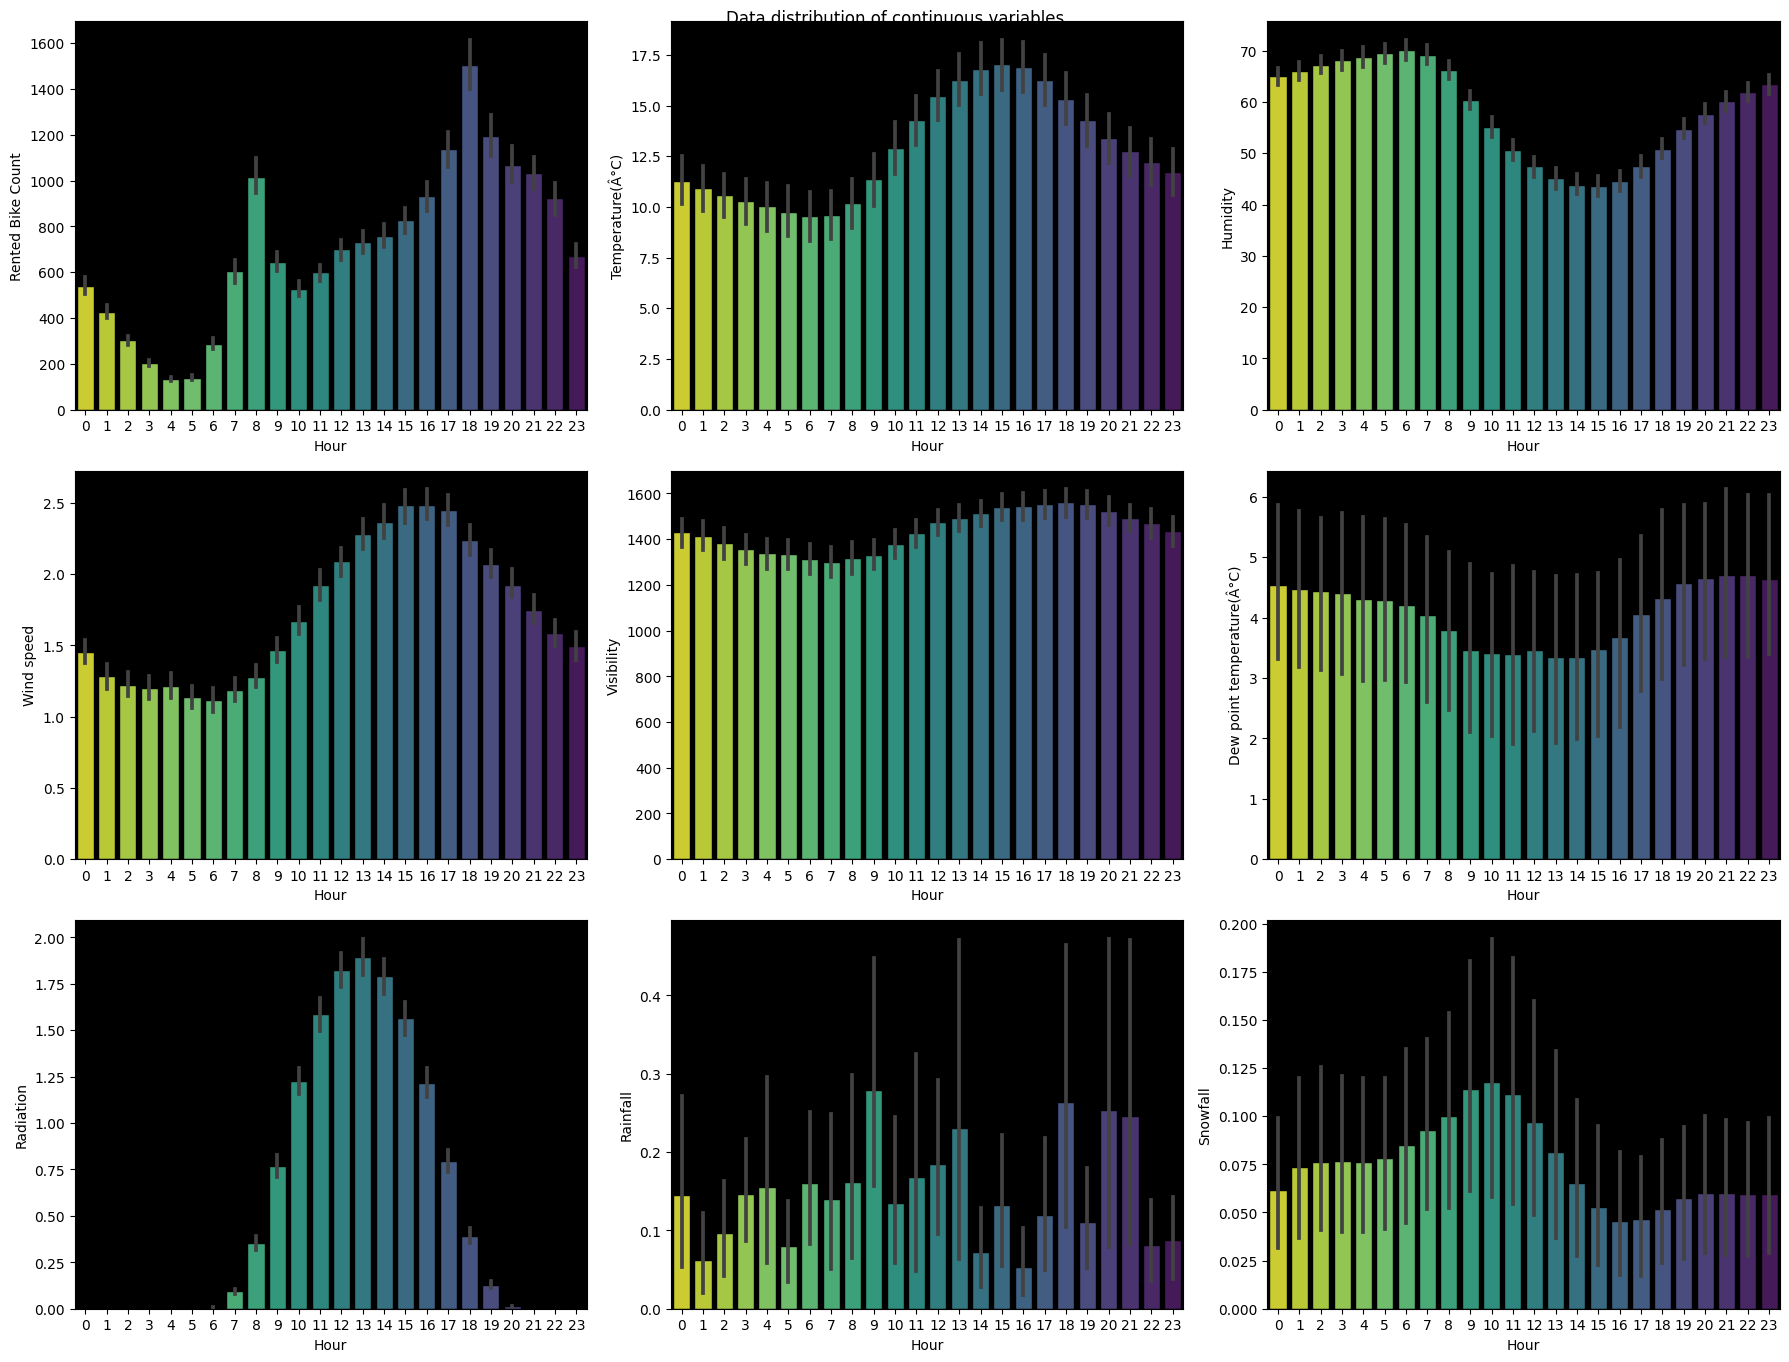

In [17]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()